### ANGGOTA KELOMPOK 2 PRAKTIKUM PEMBELAJARAN MESIN : <br>
| NIM | NAMA |
|---------|-----------|
| 121450015 | Mujadid Choirus Surya |
| 121450018 | Balqis Dwian Fitri Zamzami |
| 121450042 | Sylviani Primaastuti Ananda |
| 121450108 | Vanessa Olivia Rose |
| 121450156 | Muhammad Fahrul Aditya |

# Tugas Kelompok Modul 3

Buatlah sebuah studi kasus dengan menggunakan metode klasifikasi  metode lain
yaitu decision tree, NN, Random Fores dan SVM dan bandingkan serta jelaskan
batas keputusan (Decision Boundary) setiap metode nya. Dataset tidak boleh sama
antar kelompok baik satu kelas maupun beda kelas silahkan koordinasikan digrup. 

Berikan laporan dan Vidio presentasi laporan, dengan laporan harus berisi
rancangan pemodelan, Flow chart, pseudo code, code (SS dan dokumen IPNYB),
analisis dari hasil yang diperoleh.
Garis kuning wajib ada disetiap laporan. 

---

source dataset : https://www.kaggle.com/competitions/titanic/data

### Data Preprocessing

*Import Library*

In [203]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [204]:
train = pd.read_csv('D:\KULIAH/Semester 5/PM/train.csv')
test = pd.read_csv('D:\KULIAH/Semester 5/PM/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
train.shape

(891, 12)

In [207]:
train['non_survived'] = 1-train['Survived']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [208]:
test.shape

(418, 11)

In [209]:
train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
non_survived      0
dtype: int64

In [210]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### *Feature Extraction*

In [211]:
train_test=[train , test]
df = pd.concat(train_test, sort = False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [212]:
df.shape

(1309, 13)

Name

In [213]:
df['title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,Mr


In [214]:
Titles = {
    "Capt": "Officer","Col": "Officer", "Major": "Officer","Jonkheer": "Royalty", "Don": "Royalty","Sir" : "Royalty",
    "Dr": "Officer","Rev": "Officer","the Countess":"Royalty", "Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr",
    "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty","Dona": "Master"}

In [215]:
df['title'] = df.title.apply(lambda x: Titles[x])

In [216]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [217]:
Title_map = {'Mr': 0,
             'Mrs':1,
             'Miss': 2,
             'Master':3,
             'Royalty':4,
             'Officer':5}

In [218]:
df['title'] = df.title.apply(lambda x: Title_map[x])
df['title'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0


Sex

In [220]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [221]:
df.Sex.isnull().sum()

0

Age

In [222]:
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean , inplace = True)

In [223]:
df.Age.isnull().sum()

0

SibSp & Parch

In [224]:
df['Family_size'] = df["SibSp"]+df["Parch"] +1
df.groupby(by = ['Family_size'], as_index= False).Survived.mean()

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


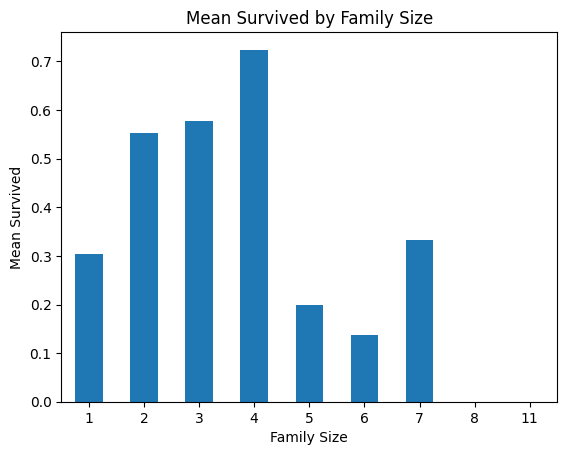

In [225]:
df.groupby(by=['Family_size']).Survived.mean().plot(kind='bar', rot=0)

plt.xlabel('Family Size')
plt.ylabel('Mean Survived')
plt.title('Mean Survived by Family Size')

plt.show()

Ukuran keluarga dengan 2, 3 dan 4 anggota memiliki peluang lebih besar untuk bertahan hidup
mengkonversi keluarga dalam 3 kelompok

- sigleton
- small family
- large family

In [226]:
Family = []
for FamilySize in df['Family_size']:
    if FamilySize==1:
        Family.append(0)
    elif (2 <= FamilySize <= 4):
        Family.append(1)
    elif ( 5<=FamilySize):
        Family.append(2)

In [227]:
df["Family"] = pd.Series(Family)

In [228]:
df.drop(['SibSp', 'Parch', 'Family_size'], axis = 1, inplace = True)

In [229]:
df.Family.isnull().sum()

0

Fare

In [230]:
df.Fare.isnull().sum()

1

In [231]:
df['Fare'] = df['Fare'].fillna(train['Fare'].median())

In [232]:
df.Fare.isnull().sum()

0

In [233]:
df['Fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

Nilai rata-rata tarif adalah sekitar 33 dan 75% dari tarif adalah 31,2
mengkonversi tarif dalam kelompok
<br>
- fare <= 7.89 <br>
- 7.89< fare <= 14.5 <br>
- 14.5< fare <= 31 <br>
- 31< fare


In [234]:
fare = []
for fares in df['Fare']:
    if fares<=7.89:
        fare.append(0)
    elif (7.89 <= fares <= 14.5):
        fare.append(1)
    elif ( 14.5< fares<=31):
        fare.append(2)
    elif (31<=fares):
        fare.append(3)

In [235]:
df['Fare_df'] = pd.Series(fare)
df['Fare_df'].unique()

array([0, 3, 1, 2], dtype=int64)

In [236]:
df.drop('Fare', axis = 1,inplace = True)

Embarked

In [237]:
df.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [238]:
df.Embarked.isnull().sum()

2

In [239]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [240]:
df['Embarked'].fillna('S', inplace = True)

In [241]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

In [242]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Cabin,Embarked,non_survived,title,Family,Fare_df
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,NaN,0,1.0,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,C85,1,0.0,1,1,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,NaN,0,0.0,2,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,C123,0,0.0,1,1,3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,373450,NaN,0,1.0,0,0,1


In [243]:
df.shape

(1309, 13)

data mencakup train & test set, kita perlu memisahkan train & test set. Data latih kami adalah 891 dan sisanya 418 adalah data uji

## *Feature Selection*

In [244]:
train_feature = df[:891]

In [245]:
test_feature = df[891:]

In [246]:
train.shape, test.shape, train_feature.shape, test_feature.shape

((891, 13), (418, 11), (891, 13), (418, 13))

In [247]:
train_df = train_feature.drop(['PassengerId','Name','Ticket', 'Cabin','non_survived'], axis = 1)

In [248]:
train_df.head()

,Survived,Pclass,Sex,Age,Embarked,title,Family,Fare_df
0,0.0,3,0,22.0,0,0,1,0
1,1.0,1,1,38.0,1,1,1,3
2,1.0,3,1,26.0,0,2,0,1
3,1.0,1,1,35.0,0,1,1,3
4,0.0,3,0,35.0,0,0,0,1


In [249]:
y = train_df['Survived'].values
X = train_df.drop(['Survived'], axis =1)

In [250]:
type(y)

numpy.ndarray

In [251]:
X.shape, y.shape

((891, 7), (891,))

In [252]:
X.head()

,Pclass,Sex,Age,Embarked,title,Family,Fare_df
0,3,0,22.0,0,0,1,0
1,1,1,38.0,1,1,1,3
2,3,1,26.0,0,2,0,1
3,1,1,35.0,0,1,1,3
4,3,0,35.0,0,0,0,1


In [253]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [254]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [255]:
X = pd.DataFrame(X)
X.columns = ['Pclass','Sex','Age','Embarked','title','Family', 'Fare_df']
X


,Pclass,Sex,Age,Embarked,title,Family,Fare_df
0,0.827377,-0.737695,-0.595254,-0.568837,-0.712190,0.855774,-1.417601
1,-1.566107,1.355574,0.635996,1.005181,0.163067,0.855774,1.364519
2,0.827377,1.355574,-0.287441,-0.568837,1.038323,-0.749478,-0.490228
3,-1.566107,1.355574,0.405137,-0.568837,0.163067,0.855774,1.364519
4,0.827377,-0.737695,0.405137,-0.568837,-0.712190,-0.749478,-0.490228
...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.210488,-0.568837,3.664093,-0.749478,-0.490228
887,-1.566107,1.355574,-0.826113,-0.568837,1.038323,-0.749478,0.437146
888,0.827377,1.355574,0.011224,-0.568837,1.038323,0.855774,0.437146
889,-1.566107,-0.737695,-0.287441,1.005181,-0.712190,-0.749478,0.437146


In [256]:
pca = PCA(n_components=2)

In [257]:
X = pca.fit_transform(X)

In [258]:
X = pd.DataFrame(X)
X = X.values

### Modelling

### Decision Tree

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=2)

In [260]:
len(X_test)

179

In [261]:
model_dt = tree.DecisionTreeClassifier(max_depth=3) #model dengan kedalaman 3
model_dt

DecisionTreeClassifier(max_depth=3)

In [262]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [263]:
model_dt.predict(X_test)

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1.])

In [264]:
y_pred_dt = model_dt.predict(X_test)
y_pred_dt

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1.])

In [265]:
pd.DataFrame({'Actual_survived': y_test, 'Predicted_survived':y_pred_dt}).head()

,Actual_survived,Predicted_survived
0,1.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0


In [266]:
accuracy_dt = model_dt.score(X_test,y_test)  
accuracy_dt

0.7039106145251397

In [267]:
y_train

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


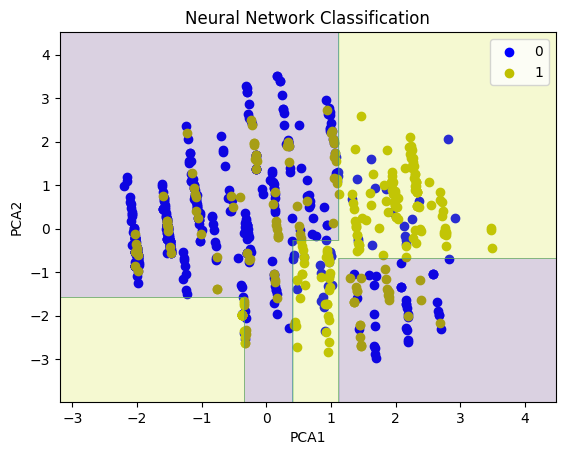

In [268]:
x_set,y_set=X_train,y_train

plt.scatter(x_set[y_set == 0,0],x_set[y_set == 0,1],label=0,color='b')
plt.scatter(x_set[y_set == 1,0],x_set[y_set == 1,1],label=1,color='y')

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

z =model_dt.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

print(z)

plt.contourf(x1,x2,z,alpha=0.2)
plt.title('Decision Tree')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Neural Network (NN)

In [269]:
from sklearn.neural_network import MLPClassifier

In [270]:
model_NN = MLPClassifier() #model dengan kedalaman 3
model_NN.fit(X_train, y_train)

MLPClassifier()

In [271]:
y_pred_NN = model_NN.predict(X_test)

In [272]:
pd.DataFrame({'Actual_survived': y_test, 'Predicted_survived':y_pred_NN }).head()

,Actual_survived,Predicted_survived
0,1.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0


In [273]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred_NN)
print("Accuracy:", Accuracy)

Accuracy: 0.7597765363128491


In [274]:
print("Accuracy:",accuracy_score(y_test, y_pred_NN))

Accuracy: 0.7597765363128491


[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


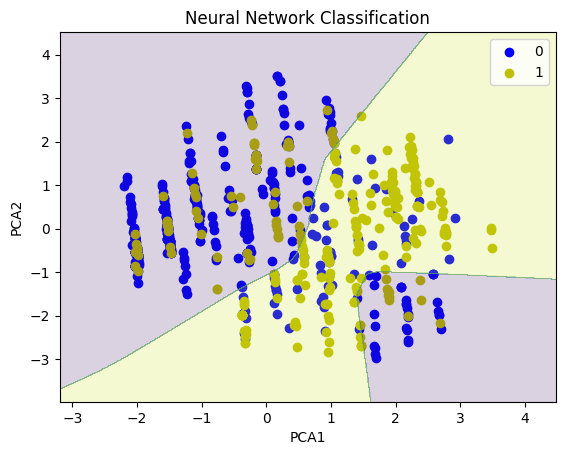

In [275]:
x_set,y_set=X_train,y_train

plt.scatter(x_set[y_set == 0,0],x_set[y_set == 0,1],label=0,color='b')
plt.scatter(x_set[y_set == 1,0],x_set[y_set == 1,1],label=1,color='y')

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

z =model_NN.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

print(z)

plt.contourf(x1,x2,z,alpha=0.2)
plt.title('Neural Network Classification')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Random Forest

In [276]:
from sklearn.ensemble import RandomForestClassifier

In [277]:
model_rf = RandomForestClassifier().fit(X_train,y_train)

In [278]:
y_pred_forest = model_rf.predict(X_test)
y_pred_forest

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1.])

In [279]:
pd.DataFrame({'Actual_survived': y_test, 'Predicted_survived':y_pred_forest }).head()

,Actual_survived,Predicted_survived
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0


In [280]:
accuracy_forest = model_rf.score(X_test,y_test)
accuracy_forest 

0.7821229050279329

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


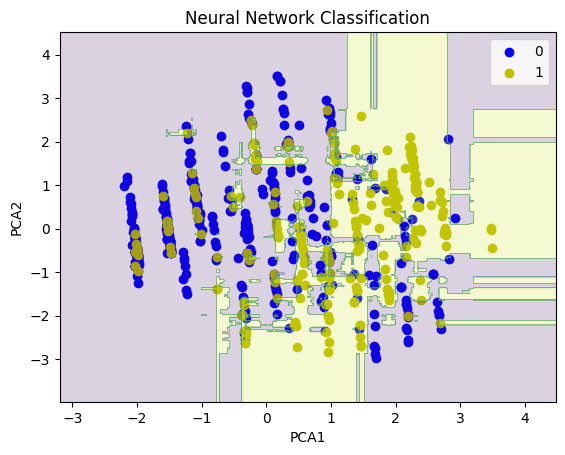

In [281]:
x_set,y_set=X_train,y_train

plt.scatter(x_set[y_set == 0,0],x_set[y_set == 0,1],label=0,color='b')
plt.scatter(x_set[y_set == 1,0],x_set[y_set == 1,1],label=1,color='y')

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

z =model_rf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

print(z)

plt.contourf(x1,x2,z,alpha=0.2)
plt.title('Random Forest')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Support Vector Machines (SVM)

In [282]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_pred_svm= svm_clf.predict(X_test)
y_pred_svm

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1.])

In [283]:
pd.DataFrame({'Actual_survived': y_test, 'Predicted_survived':y_pred_svm }).head()

,Actual_survived,Predicted_survived
0,1.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0


In [284]:
acc_svc = svm_clf.score(X_test, y_test) 
print (acc_svc)

0.7597765363128491


In [285]:
from sklearn.metrics import accuracy_score
Accuracy_svm = accuracy_score(y_test,y_pred_svm)
print("Accuracy:", Accuracy_svm)

Accuracy: 0.7597765363128491


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


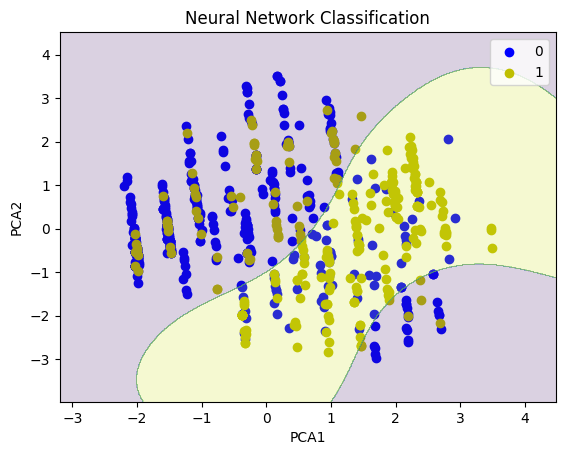

In [286]:
x_set,y_set=X_train,y_train

plt.scatter(x_set[y_set == 0,0],x_set[y_set == 0,1],label=0,color='b')
plt.scatter(x_set[y_set == 1,0],x_set[y_set == 1,1],label=1,color='y')

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

z =svm_clf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

print(z)

plt.contourf(x1,x2,z,alpha=0.2)
plt.title('Support Vector Machines (SVM)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

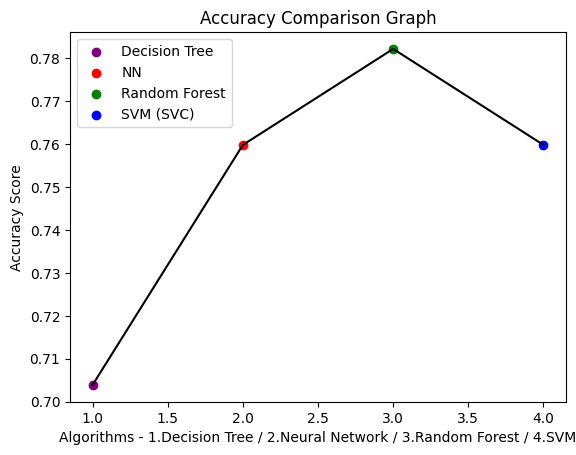

In [287]:
plt.title("Accuracy Comparison Graph")
plt.ylabel("Accuracy Score")

plt.xlabel("Algorithms - 1.Decision Tree / 2.Neural Network / 3.Random Forest / 4.SVM")

y = [accuracy_dt,Accuracy,accuracy_forest, Accuracy_svm]

plt.plot([1,2,3,4],y, color = "black")


plt.scatter(1,accuracy_dt, marker="o", color = "purple",label = "Decision Tree")

plt.scatter(2,Accuracy, marker="o", color="red", label="NN")

plt.scatter(3,accuracy_forest, marker="o", color="green", label="Random Forest")

plt.scatter(4,Accuracy_svm, marker="o", color="blue", label="SVM (SVC)")

 
plt.legend()
plt.show()

| Modelling                | Accuracy   |
|-----------------------|--------|
| Decision Tree    |    83%    |
| Neural Network    |   81%     |
| Random Forest    |   80%     |
| Support Vector Machines    |   62%     |